In [40]:
import numpy as np
import matplotlib.pyplot as plt
import requests 

In [41]:
S_NH3=227.829
S_H2=155.606
S_N2=216.866
H_NH3=-52.618*1000
T=700  #temperatura en kelvin
pt=200 #presion en barr
R=8.314 #J/K-mol

In [42]:
uNH3_est=H_NH3-T*S_NH3
uH2_est=-T*S_H2
uN2_est=-T*S_N2
print(uNH3_est,uH2_est,uN2_est)

-212098.30000000002 -108924.2 -151806.2


In [43]:
x=np.arange(0.001,1,0.001)
n_NH3=2-2*x
n_N2=x
n_H2=3*x
nt=2+2*x
X_NH3=n_NH3/nt
X_N2=n_N2/nt
X_H2=n_H2/nt


[0.54]


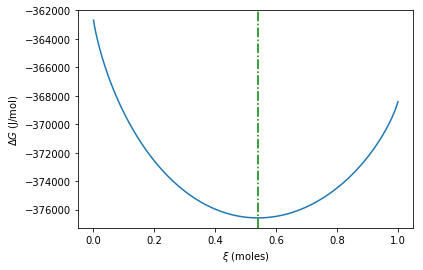

In [44]:
uNH3=uNH3_est+R*T*np.log(X_NH3)+R*T*np.log(pt)
uN2=uN2_est+R*T*np.log(X_N2)+R*T*np.log(pt)
uH2=uH2_est+R*T*np.log(X_H2)+R*T*np.log(pt)
uT=n_NH3*uNH3+n_N2*uN2+n_H2*uH2

minimo=np.min(uT)
n=np.where(uT==minimo)
xeq=x[n]
print(xeq)

plt.plot(x,uT)
plt.xlabel(r'$\xi$ (moles)')
plt.ylabel(r'$\Delta G$ (J/mol)')
plt.axvline(x=xeq,color='green',linestyle="-.")
plt.show()


In [45]:
pNH3=(2-(2*xeq))/(2+(2*xeq))*pt
pH2=(3*xeq)/(2+(2*xeq))*pt
pN2=(xeq)/(2+(2*xeq))*pt
Kp=(pN2*pH2**3)/pNH3**2
Kp

array([11437.25244632])

In [46]:
G_NH3=27190
Kp=np.exp(-27190/(8.314*700))
Kp

0.009353713441156025

In [47]:
xeq=0.54
n_H2=3*xeq
n_N2=xeq
n_NH3=2-2*xeq
nt=n_NH3+n_N2+n_H2
pt=200
pH2=pt*n_H2/nt
pN2=pt*n_N2/nt
pNH3=pt*n_NH3/nt
kp=pN2*pH2**3/pNH3**2
print(kp)

11437.252446323717
